# 앙상블 학습: 엑스트라 트리 (Extra Trees)
# ----------------------------------------------------
# 엑스트라 트리(Extra Trees, Extremely Randomized Trees)는 여러 개의 결정 트리를 만들어 앙상블 학습을 수행하는 모델입니다.
# 랜덤 포레스트와 매우 유사하지만, 트리를 구성하는 방식에서 중요한 차이점이 있습니다.
#
# 핵심 아이디어
# * 극단적인 무작위성(Extremely Randomized): 랜덤 포레스트는 각 분할(split)마다 최적의 특성과 분할 기준을 찾지만,
#   엑스트라 트리는 분할 기준 자체를 무작위로 선택합니다.
#
# 랜덤 포레스트 vs 엑스트라 트리
#
# |                 | 랜덤 포레스트              | 엑스트라 트리              |
# | :-------------- | :------------------------- | :------------------------- |
# | 분할 기준 선택  | 최적의 분할 기준을 탐색    | 무작위로 분할 기준을 선택  |
# | 모델의 편향(Bias) | 약간 더 높음               | 약간 더 낮음               |
# | 모델의 분산(Variance) | 상대적으로 낮음            | 랜덤성 증가로 더 낮아질 가능성 있음 |
# | 훈련 속도       | 최적의 기준을 찾느라 느림 | 무작위 선택으로 빠름       |
#
#
# 장점
# * 빠른 훈련 속도: 최적의 분할 기준을 찾지 않기 때문에 모델을 더 빠르게 학습시킬 수 있습니다.
# * 과적합 방지: 무작위성이 더해져 모델의 분산이 낮아지고, 과적합을 더 효과적으로 방지할 수 있습니다.
#
# ----------------------------------------------------


In [1]:
# 필요한 라이브러리를 임포트합니다.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import time

# --- make_classification 함수에 대한 설명 ---
# make_classification 함수는 분류 모델 테스트를 위한 가상의 데이터셋을 만들어주는 함수입니다.
# 현실 데이터처럼 복잡하지 않고, 모델의 성능을 쉽게 확인하고 비교할 수 있도록 설계되었습니다.
# 쉽게 말해, 우리가 설정한 규칙에 따라 정답(클래스)이 명확한 가짜 데이터를 생성하는 겁니다.

# 1. 예제용 가상의 데이터셋을 생성합니다.
X, y = make_classification(
    n_samples=1000,          # 생성할 전체 데이터의 개수입니다. (예: 1000명의 사람 데이터)
    n_features=20,           # 데이터가 가진 특성(컬럼)의 총 개수입니다. (예: 20가지 정보)
    n_informative=15,        # 정답(클래스)을 예측하는 데 실제로 중요한 특성의 개수입니다.
    n_redundant=5,           # 다른 중요한 특성들과 거의 똑같은 중복 특성의 개수입니다.
    random_state=42          # 매번 동일한 결과를 얻기 위한 난수 시드
)
# -----------------------------------------------

# 2. 훈련 세트와 테스트 세트로 데이터를 나눕니다.
# 훈련에 80%, 평가에 20%를 사용합니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 테스트 세트의 비율
    random_state=42
)

print("데이터셋 준비 완료.")
print("-" * 30)

# 3. 엑스트라 트리 모델을 훈련하고 성능을 평가합니다.
# n_estimators=100은 100개의 결정 트리를 만든다는 의미입니다.
print("엑스트라 트리 모델 훈련 시작...")
extra_tree = ExtraTreesClassifier(n_estimators=100, random_state=42)

start_time_et = time.time()
extra_tree.fit(X_train, y_train)
end_time_et = time.time()

# 훈련된 모델로 테스트 세트의 예측을 수행합니다.
y_pred_et = extra_tree.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred_et)

print(f"엑스트라 트리 모델 훈련 시간: {end_time_et - start_time_et:.4f}초")
print(f"엑스트라 트리 모델의 정확도: {accuracy_et:.4f}")
print("-" * 30)

# 4. 비교를 위해 랜덤 포레스트 모델을 훈련하고 성능을 평가합니다.
# n_estimators=100은 동일하게 설정하여 비교합니다.
print("랜덤 포레스트 모델 훈련 시작...")
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

start_time_rf = time.time()
random_forest.fit(X_train, y_train)
end_time_rf = time.time()

# 훈련된 모델로 테스트 세트의 예측을 수행합니다.
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"랜덤 포레스트 모델 훈련 시간: {end_time_rf - start_time_rf:.4f}초")
print(f"랜덤 포레스트 모델의 정확도: {accuracy_rf:.4f}")

# --- 결과 분석 주석 ---
# 이 결과가 의미하는 것:
# - 훈련 속도: 엑스트라 트리 모델이 랜덤 포레스트보다 훨씬 빠르게 훈련을 마쳤습니다.
#   이는 엑스트라 트리가 최적의 분할 기준을 찾지 않고 무작위로 선택하기 때문에 계산 비용이 적게 들어서입니다.
# - 모델 성능: 이 예시에서는 엑스트라 트리가 랜덤 포레스트보다 약 3.5% 더 높은 정확도를 보였습니다.
#   엑스트라 트리의 무작위성이 과대적합을 더 효과적으로 방지하여 더 좋은 일반화 성능을 냈다고 볼 수 있습니다.
# 결론적으로, 이번 실습을 통해 "엑스트라 트리는 랜덤 포레스트와 비슷한 성능을 내면서도 더 빠른 훈련 속도를 가질 수 있다"는 핵심 개념을 직접 확인하신 겁니다.
# --------------------


데이터셋 준비 완료.
------------------------------
엑스트라 트리 모델 훈련 시작...
엑스트라 트리 모델 훈련 시간: 0.1530초
엑스트라 트리 모델의 정확도: 0.9350
------------------------------
랜덤 포레스트 모델 훈련 시작...
랜덤 포레스트 모델 훈련 시간: 0.3283초
랜덤 포레스트 모델의 정확도: 0.9000


엑스트라 트리를 구성하는 첫 번째 나무의 시각화 결과입니다.
이것은 전체 엑스트라 트리 모델이 아닌, 그 중 한 개의 나무입니다.


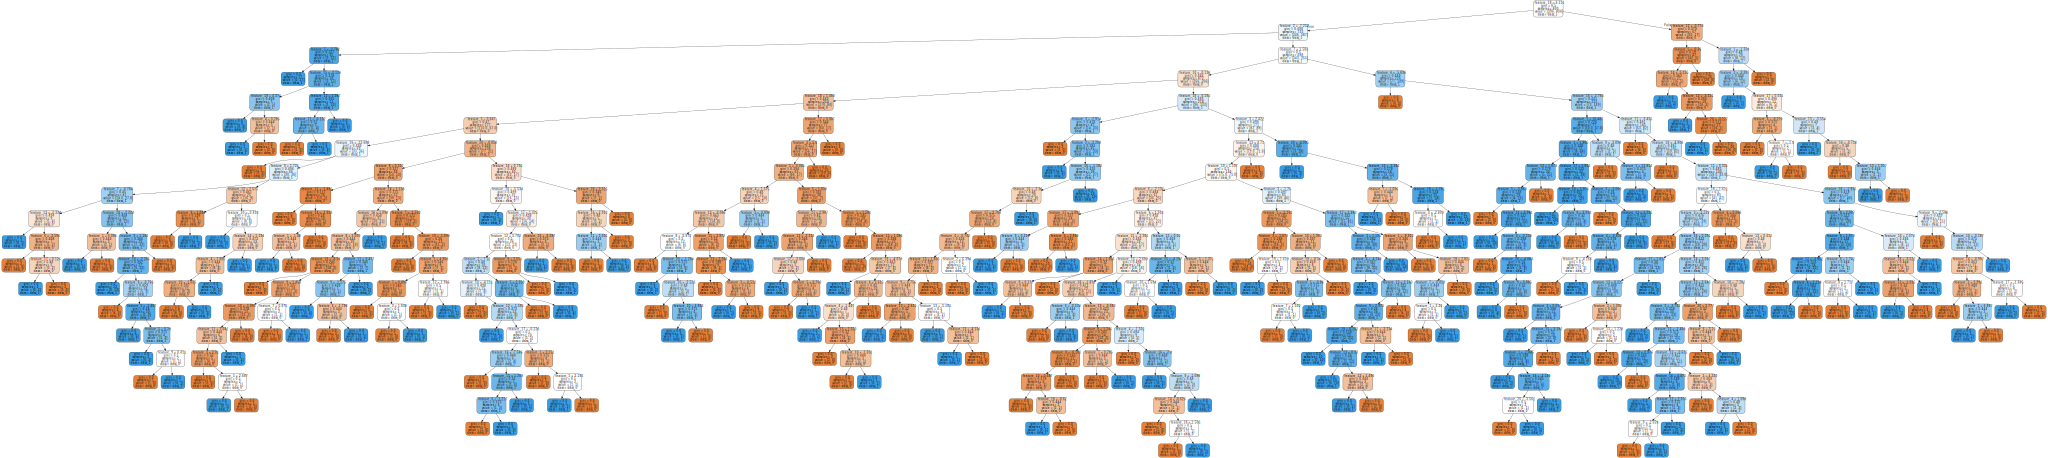

In [3]:
# 필요한 라이브러리를 임포트합니다.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
import graphviz # 시각화 도구인 graphviz를 임포트합니다.

# 1. 예제용 가상의 데이터셋을 생성합니다.
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# 2. 훈련 세트와 테스트 세트로 데이터를 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 3. 엑스트라 트리 모델을 훈련합니다.
extra_tree = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_tree.fit(X_train, y_train)

# 4. 엑스트라 트리를 구성하는 수많은 나무 중 첫 번째 나무를 선택합니다.
# extra_tree.estimators_는 엑스트라 트리가 만든 모든 나무들을 리스트 형태로 가지고 있습니다.
first_tree = extra_tree.estimators_[0]

# 5. 선택한 나무를 DOT 형식으로 변환합니다.
# `export_graphviz`는 의사결정나무를 시각화에 적합한 텍스트 형태로 바꿔주는 함수입니다.
dot_data = export_graphviz(
    first_tree,
    feature_names=[f"feature_{i+1}" for i in range(X.shape[1])],
    class_names=['class_0', 'class_1'],
    filled=True,
    rounded=True,
    special_characters=True
)

# 6. DOT 데이터를 그래프로 변환하고 화면에 출력합니다.
# `graphviz.Source`는 DOT 텍스트를 실제 시각화 그래프로 만들어줍니다.
graph = graphviz.Source(dot_data)

print("엑스트라 트리를 구성하는 첫 번째 나무의 시각화 결과입니다.")
print("이것은 전체 엑스트라 트리 모델이 아닌, 그 중 한 개의 나무입니다.")

# 주피터 노트북 환경에서 그래프를 자동으로 출력합니다.
graph
